In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [3]:
df=pd.read_csv('weather-raw_2020.csv')

In [4]:
df.isnull().sum()

Date                                  0
Temp                                  0
Humidity (%)                        670
Dew Point (Celcius * 10)            621
Pressure (mBar)                     347
Mean wind speed (knots * 10)        696
Average wind bearing (degrees)    18391
Sunshine (hours * 100)                0
Rainfall (mm * 1000)                  0
dtype: int64

In [5]:
#df=df.drop(['Date'],axis=1)
df=df.fillna(0)

In [6]:
df.isnull().sum()

Date                              0
Temp                              0
Humidity (%)                      0
Dew Point (Celcius * 10)          0
Pressure (mBar)                   0
Mean wind speed (knots * 10)      0
Average wind bearing (degrees)    0
Sunshine (hours * 100)            0
Rainfall (mm * 1000)              0
dtype: int64

In [7]:
#df=df.values
df.head(116)

,Date,Temp,Humidity (%),Dew Point (Celcius * 10),Pressure (mBar),Mean wind speed (knots * 10),Average wind bearing (degrees),Sunshine (hours * 100),Rainfall (mm * 1000)
0,6/30/1995,30.5,36.0,140.0,1013.0,13.0,315.0,50,0
1,6/30/1995,31.1,41.0,163.0,1013.0,12.0,315.0,51,0
2,6/30/1995,32.2,43.0,181.0,1013.0,2.0,315.0,50,0
3,6/30/1995,32.7,41.0,178.0,1013.0,8.0,225.0,51,0
4,6/30/1995,32.2,43.0,181.0,1012.0,17.0,0.0,51,0
...,...,...,...,...,...,...,...,...,...
111,7/2/1995,12.7,84.0,100.0,1004.0,0.0,0.0,0,140
112,7/2/1995,12.7,79.0,92.0,1004.0,3.0,45.0,0,90
113,7/2/1995,12.7,84.0,100.0,1004.0,0.0,0.0,0,20
114,7/2/1995,12.7,84.0,100.0,1004.0,0.0,0.0,0,0


In [8]:
df.columns
df['Date']=pd.to_datetime(df['Date'])
df['Date']

0        1995-06-30
1        1995-06-30
2        1995-06-30
3        1995-06-30
4        1995-06-30
            ...    
439224   2020-11-12
439225   2020-11-12
439226   2020-11-12
439227   2020-11-12
439228   2020-11-12
Name: Date, Length: 439229, dtype: datetime64[ns]

In [9]:
df['Year']=df['Date'].apply(lambda date: date.year)
df['Month']=df['Date'].apply(lambda date: date.month)
df=df.drop(['Date'],axis=1)

In [10]:
df.describe().transpose()
df.head(5)

,Temp,Humidity (%),Dew Point (Celcius * 10),Pressure (mBar),Mean wind speed (knots * 10),Average wind bearing (degrees),Sunshine (hours * 100),Rainfall (mm * 1000),Year,Month
0,30.5,36.0,140.0,1013.0,13.0,315.0,50,0,1995,6
1,31.1,41.0,163.0,1013.0,12.0,315.0,51,0,1995,6
2,32.2,43.0,181.0,1013.0,2.0,315.0,50,0,1995,6
3,32.7,41.0,178.0,1013.0,8.0,225.0,51,0,1995,6
4,32.2,43.0,181.0,1012.0,17.0,0.0,51,0,1995,6


In [11]:
df['Temp'].sort_values()

355215   -40.0
353110   -40.0
353108   -40.0
353107   -40.0
353106   -40.0
          ... 
353105    40.0
353104    40.0
353101    40.0
353090    40.0
353096    40.0
Name: Temp, Length: 439229, dtype: float64

<AxesSubplot:xlabel='Temp'>

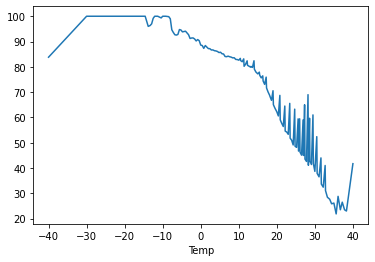

In [12]:
df.groupby('Temp').mean()['Humidity (%)'].plot()

In [13]:
df.corr()['Temp'].sort_values()

Humidity (%)                     -0.534227
Year                             -0.071938
Rainfall (mm * 1000)             -0.000086
Average wind bearing (degrees)    0.015190
Pressure (mBar)                   0.019545
Sunshine (hours * 100)            0.058955
Mean wind speed (knots * 10)      0.100512
Month                             0.191085
Dew Point (Celcius * 10)          0.798886
Temp                              1.000000
Name: Temp, dtype: float64

<AxesSubplot:>

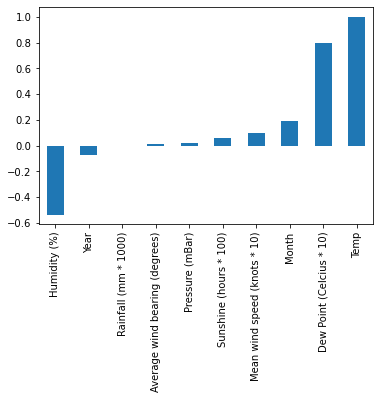

In [14]:
df.corr()['Temp'].sort_values().plot(kind='bar')

In [15]:
X=df.drop('Temp',axis=1).values
y=df['Temp'].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [46]:
model=Sequential()
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(loss='mse',optimizer='adam')
model.fit(x=X_train,y=y_train, epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
9609/9609 [==============================] - 7s 652us/step - loss: 28.4545 - val_loss: 0.9195
Epoch 2/30
9609/9609 [==============================] - 6s 642us/step - loss: 0.9873 - val_loss: 0.8485
Epoch 3/30
9609/9609 [==============================] - 6s 669us/step - loss: 0.9333 - val_loss: 0.7689
Epoch 4/30
9609/9609 [==============================] - 8s 810us/step - loss: 0.7487 - val_loss: 0.6622
Epoch 5/30
9609/9609 [==============================] - 8s 801us/step - loss: 0.6323 - val_loss: 0.4462
Epoch 6/30
9609/9609 [==============================] - 8s 811us/step - loss: 0.4450 - val_loss: 0.4200
Epoch 7/30
9609/9609 [==============================] - 8s 805us/step - loss: 0.4374 - val_loss: 0.4238
Epoch 8/30
9609/9609 [==============================] - 8s 815us/step - loss: 0.3884 - val_loss: 0.3995
Epoch 9/30
9609/9609 [==============================] - 8s 813us/step - loss: 0.3892 - val_loss: 0.3984
Epoch 10/30
9609/9609 [==============================] - 8s 819

In [47]:
losses=pd.DataFrame(model.history.history)

Text(0, 0.5, 'Loss')

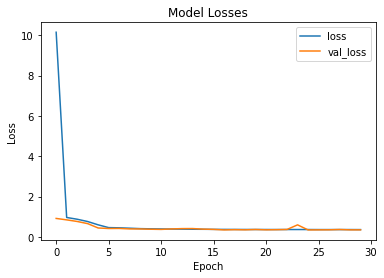

In [48]:
losses.plot()
plt.title('Model Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')


In [49]:
prediction=model.predict(X_test)

In [50]:
mean_squared_error(y_test,prediction)

0.35357165803546275

In [51]:
RMSE=mean_squared_error(y_test,prediction, squared=False)

In [52]:
print(RMSE)

0.5946189183295993


Text(0, 0.5, 'Predicted Temperature(K)')

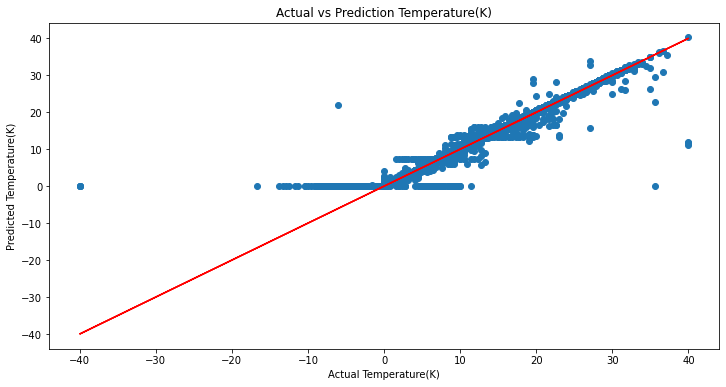

In [64]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,prediction)
plt.plot(y_test,y_test,'r')
plt.title('Actual vs Prediction Temperature(K)')
plt.xlabel('Actual Temperature(K)')
plt.ylabel('Predicted Temperature(K)')


In [61]:
single_value=df.drop('Temp',axis=1).iloc[0]

In [62]:
single_value

Humidity (%)                        36.0
Dew Point (Celcius * 10)           140.0
Pressure (mBar)                   1013.0
Mean wind speed (knots * 10)        13.0
Average wind bearing (degrees)     315.0
Sunshine (hours * 100)              50.0
Rainfall (mm * 1000)                 0.0
Year                              1995.0
Month                                6.0
Prediction                           0.0
Name: 0, dtype: float64

In [63]:
single_value=scaler.transform(single_value.values.reshape(-1,9))

ValueError: cannot reshape array of size 10 into shape (9)

In [29]:
single_value

array([[0.36      , 0.73188406, 0.87705628, 0.00866667, 1.        ,
        0.00659457, 0.00125826, 0.        , 0.45454545]])

In [30]:
df.head(1)

,Temp,Humidity (%),Dew Point (Celcius * 10),Pressure (mBar),Mean wind speed (knots * 10),Average wind bearing (degrees),Sunshine (hours * 100),Rainfall (mm * 1000),Year,Month
0,30.5,36.0,140.0,1013.0,13.0,315.0,50,0,1995,6


In [31]:
model.predict(single_value)

array([[0.]], dtype=float32)

In [32]:
Temp=df['Temp']


In [33]:
X_all=scaler.transform(X)

In [34]:
all_prediction=model.predict(X_all)

In [35]:
all_prediction.shape

(439229, 1)

In [36]:
prediction.shape

(131769, 1)

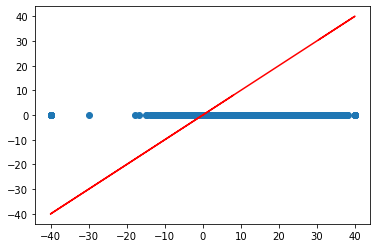

In [37]:
plt.scatter(Temp,all_prediction)
plt.plot(Temp,Temp,'r')

In [38]:
Prediction=pd.DataFrame(all_prediction)
#df['Prediction']=df

In [39]:
type(Prediction)

pandas.core.frame.DataFrame

In [40]:
df['Prediction']=Prediction

In [41]:
df.head(5)

,Temp,Humidity (%),Dew Point (Celcius * 10),Pressure (mBar),Mean wind speed (knots * 10),Average wind bearing (degrees),Sunshine (hours * 100),Rainfall (mm * 1000),Year,Month,Prediction
0,30.5,36.0,140.0,1013.0,13.0,315.0,50,0,1995,6,0.0
1,31.1,41.0,163.0,1013.0,12.0,315.0,51,0,1995,6,0.0
2,32.2,43.0,181.0,1013.0,2.0,315.0,50,0,1995,6,0.0
3,32.7,41.0,178.0,1013.0,8.0,225.0,51,0,1995,6,0.0
4,32.2,43.0,181.0,1012.0,17.0,0.0,51,0,1995,6,0.0


<AxesSubplot:>

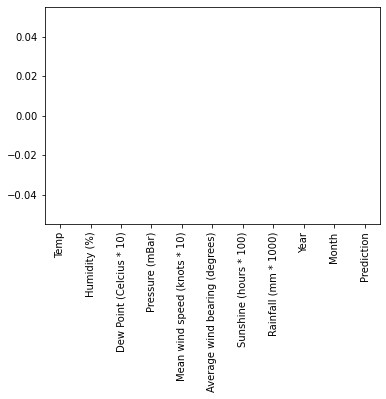

In [42]:
df.corr()['Prediction'].sort_values().plot(kind='bar')

In [43]:
df.corr()['Prediction'].sort_values()

Temp                             NaN
Humidity (%)                     NaN
Dew Point (Celcius * 10)         NaN
Pressure (mBar)                  NaN
Mean wind speed (knots * 10)     NaN
Average wind bearing (degrees)   NaN
Sunshine (hours * 100)           NaN
Rainfall (mm * 1000)             NaN
Year                             NaN
Month                            NaN
Prediction                       NaN
Name: Prediction, dtype: float64

In [44]:
model.save('Toyon_Weather_ANN.h5')